In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
datos =pd.read_csv(r"train.csv",encoding='latin-1')
#abro el data frame

In [3]:
#voy a analizar cuantos # contienen cada tweet y creo
#una serie que cuenta por cada hastag
cantidadHashtags = datos['text'].str.count('#')
cantidadHashtags.value_counts()

0     5852
1      964
2      405
3      208
4       83
5       41
6       26
10      10
7        8
8        8
13       4
11       2
9        2
Name: text, dtype: int64

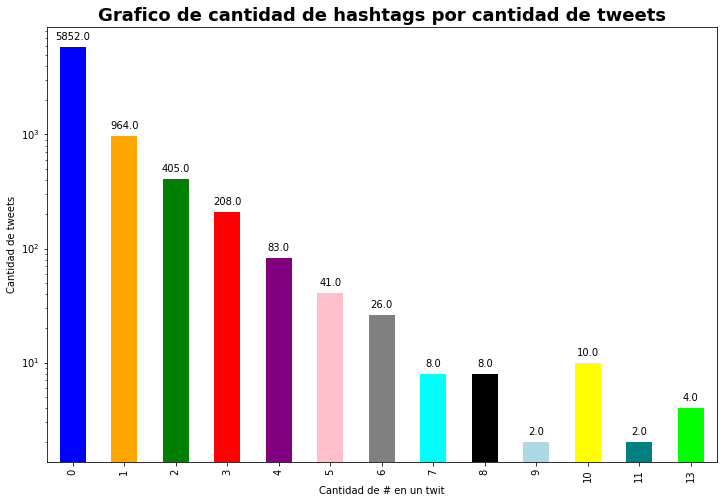

In [4]:
ax = cantidadHashtags.value_counts().sort_index().plot.bar(figsize=(12, 8),logy=True,
        color=['blue','orange','green','red','purple','pink','gray','cyan','k','lightblue','yellow','teal','lime'])
ax.set_title('Grafico de cantidad de hashtags por cantidad de tweets',fontsize=18,fontweight='bold')
ax.set_xlabel('Cantidad de # en un twit')
ax.set_ylabel('Cantidad de tweets')
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("hashtagxtweet.png")

In [5]:
cantidadHs=cantidadHashtags.to_frame()
cantidadHs['target']=datos.target

In [6]:
x = cantidadHs.groupby('text').sum()

In [7]:
x['total'] = cantidadHashtags.value_counts().sort_index()
x['tweets falsos']=x['total']-x['target']
x=x.rename(columns={'target':'tweets verdaderos'})
x

,tweets verdaderos,total,tweets falsos
text,,,
0,2396,5852,3456
1,482,964,482
2,203,405,202
3,100,208,108
4,38,83,45
5,23,41,18
6,7,26,19
7,4,8,4
8,7,8,1


Hago un drop porque considero que tweets que representan menos del 1% del total no son relevantes

In [8]:
x.drop(x[x.total < datos.target.count()*0.01].index,inplace=True)
#Example
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

In [9]:
x

,tweets verdaderos,total,tweets falsos
text,,,
0,2396,5852,3456
1,482,964,482
2,203,405,202
3,100,208,108
4,38,83,45


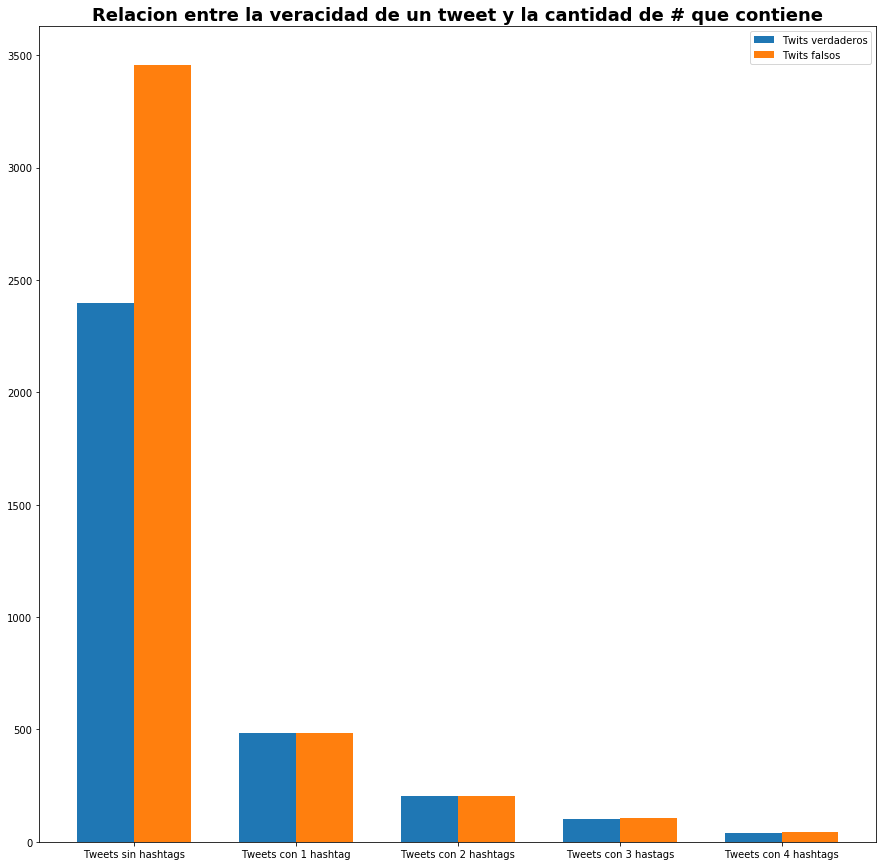

In [10]:
#hago un grafico de barras compuesto para cada relacion que determine recien
N = 5
fig, ax = plt.subplots(figsize=(15,15))
verdaderos = [x.loc[0,'tweets verdaderos'],x.loc[1,'tweets verdaderos'],x.loc[2,'tweets verdaderos'],x.loc[3,'tweets verdaderos'],
             x.loc[4,'tweets verdaderos']]
falsos = [x.loc[0,'tweets falsos'],x.loc[1,'tweets falsos'],x.loc[2,'tweets falsos'],x.loc[3,'tweets falsos'],
             x.loc[4,'tweets falsos']]

ind = np.arange(N) 
width = 0.35         
p1 = ax.bar(ind, verdaderos , width, bottom=0)
p2 = ax.bar(ind + width, falsos, width, bottom=0)

ax.set_title('Relacion entre la veracidad de un tweet y la cantidad de # que contiene',fontsize=18,fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Tweets sin hashtags', 'Tweets con 1 hashtag', 
                    'Tweets con 2 hashtags', 
                   'Tweets con 3 hastags','Tweets con 4 hashtags'))
ax.legend((p1[0], p2[0]), ('Twits verdaderos', 'Twits falsos'))
plt.savefig("veracidadxhasht.png")

In [11]:
datos =pd.read_csv(r"train.csv",encoding='latin-1')
def caca(x):
    if x.count('#')>0:
        listaHashtags=[]
        hashtag=''
        flag=False
        for c in x:
            if c == '#' or flag==True:
                hashtag=hashtag+c
                flag=True
            if c == ' ' and flag==True:
                flag=False
                listaHashtags.append(hashtag)
                hashtag=''
        return listaHashtags
    return '0'

datos['hashtags'] = datos.text.apply(lambda x: caca(x))
datos

,id,keyword,location,text,target,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[#earthquake ]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[#wildfires ]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[#Alaska , #wildfires ]"
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0


In [12]:
res = datos.set_index(['id','keyword','location','text','target'])['hashtags'].apply(pd.Series).stack()
res = res.reset_index()
res.columns = ['id','keyword','location','text','target','?','hashtags']
res

,id,keyword,location,text,target,?,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,#earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,#wildfires
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,#Alaska
...,...,...,...,...,...,...,...
8417,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,0
8418,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,0
8419,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,0
8420,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,0


In [13]:
text = res['hashtags']
text = [ elem for elem in text if elem!= '0'] 
text

['#earthquake ',
 '#wildfires ',
 '#Alaska ',
 '#wildfires ',
 '#RockyFire ',
 '#CAfire ',
 '#flood ',
 '#disaster ',
 '#raining ',
 '#flooding ',
 '#Florida ',
 '#TampaBay ',
 '#Tampa ',
 '#Flood ',
 '#We ',
 '#BREAKING ',
 '#metal ',
 '#RT ',
 '#AFRICANBAZE: ',
 '#mufc ',
 '#Bridgetown ',
 '#Kurds ',
 '#Diyala ',
 '#California ',
 '#climate ',
 '#energy ',
 '#NowPlaying: ',
 '#NashvilleTraffic. ',
 '#SantaClara ',
 '#BayArea ',
 '#Traffic ',
 '#personalinjury ',
 '#solicitor ',
 '#stlouis ',
 '#caraccidentlawyer ',
 '#TruckCrash ',
 '#FortWorth ',
 '#Ashville ',
 '#traffic ',
 '#Manchester ',
 '#BREAKING: ',
 '#Hagerstown ',
 '#Bahrain ',
 '#Dubstep ',
 '#TrapMusic ',
 '#DnB ',
 '#EDM ',
 '#Dance ',
 '#IcesÂ\x89Ã\x9b_ ',
 '#Dubstep ',
 '#TrapMusic ',
 '#DnB ',
 '#EDM ',
 '#Dance ',
 '#IcesÂ\x89Ã\x9b_ ',
 '#GrowingUpSpoiled ',
 '#Dubstep ',
 '#TrapMusic ',
 '#DnB ',
 '#EDM ',
 '#Dance ',
 '#IcesÂ\x89Ã\x9b_ ',
 '#Dubstep ',
 '#TrapMusic ',
 '#DnB ',
 '#EDM ',
 '#Dance ',
 '#IcesÂ\x89Ã\

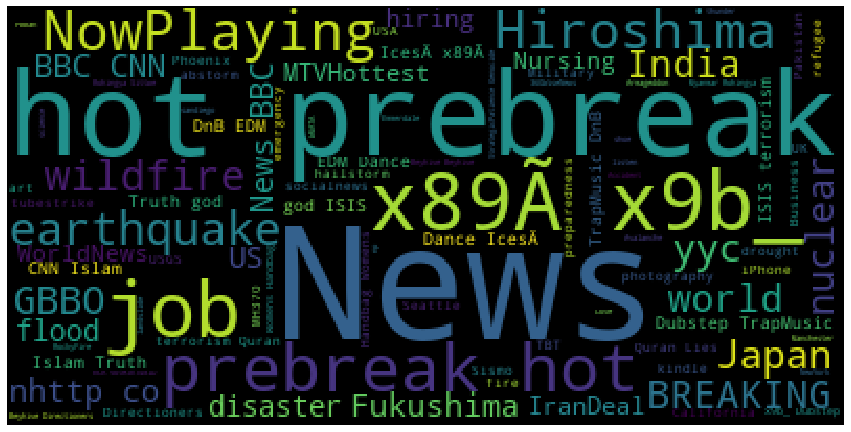

In [14]:
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcl.png')